# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| DAVI AUGUSTO DE ARO             | RM 333707      | `8IA` |
| DAVID ALVES DE SOUZA JUNIOR             | RM 334092      | `8IA` |
| LUCAS CUCCURULLO LEITE             | RM 334811      | `8IA` |
| RAFAEL RODRIGUES DE OLIVEIRA SOUZA             | RM 333623      | `8IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**: 1.300 para as classes Bacteriana e Controle e 1.264 para a classe Viral

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

Using TensorFlow backend.


## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [2]:
## IMPLEMENTE
divisao_treino_validacao = 0.2

# 4.3.1 Pré-Processamento das imagens

In [72]:
# Função para tratar as imagens
import glob
import cv2
import lungs_finder as lf


def tratamento(nome,destino,arquivo):
    
    print("Leitura: " + nome)
    raiox = cv2.imread(nome) #,cv2.IMREAD_GRAYSCALE)
    
    #Sem tratamento
    #Melhor resultado com 300 imagens: val_precision_score: 0.73339 na 2º Epoch
    #raiox = cv2.cvtColor(raiox, cv2.COLOR_BGR2RGB)
    #height, width = raiox.shape[:2]
    #if height >= 224 and width >= 224:
    #    resized_image = cv2.resize(raiox, (224, 224))
    #    cv2.imwrite(destino+arquivo, resized_image)
    
    # Escala de cinza de suavização através da mediana
    #Melhor resultado com 300 imagens: val_precision_score: 0.6833 na 3º Epoch
    imagem_cinza = cv2.cvtColor(raiox, cv2.COLOR_BGR2GRAY)
    imagem_tratada = cv2.medianBlur(imagem_cinza, 15)
    height, width = imagem_tratada.shape[:2]
    if height >= 500 and width >= 500:
        resized_image = cv2.resize(imagem_tratada, (224, 224))
        cv2.imwrite(destino+arquivo, resized_image)
        return 1
    return 0
    # Escala de cinza e escurescimento da imagem
    # Melhor resultado com 300 imagens: val_precision_score: 0.6661 na 3º Epoch
    #raiox = cv2.imread(nome, cv2.IMREAD_GRAYSCALE)
    #matriz_brilho = np.ones(raiox.shape, np.uint8) * 100
    #imagem_tratada = cv2.subtract(raiox, matriz_brilho)
    #cv2.imwrite(destino+arquivo, imagem_tratada)
    #return 1
    
    # Escala de cinza e escurescimento da imagem
    # Melhor resultado com todas as imagens: val_precision_score: 0.4936 
    #raiox = cv2.cvtColor(raiox, cv2.COLOR_BGR2RGB)
    #matriz_brilho = np.ones(raiox.shape, np.uint8) * 100
    #imagem_tratada = cv2.add(raiox, matriz_brilho)
    
    #Normalizacao
    #norm_img = np.zeros((224,224))
    #imagem_tratada = cv2.normalize(resized_image,norm_img, 0, 255, cv2.NORM_MINMAX)
    
#    height, width = raiox.shape[:2]
#    if height >= 224 and width >= 224:
#        resized_image = cv2.resize(raiox, (224, 224))
#        heatmap = cv2.applyColorMap(resized_image, cv2.COLORMAP_HOT)
#        cv2.imwrite(destino+arquivo, heatmap)
#        return 1
#===========================================================    
#    try:
#
#        #raiox = cv2.cvtColor(raiox, cv2.COLOR_BGR2RGB)
#
#        found_lungs = lf.get_lungs(raiox)
#
#        if found_lungs is not None and found_lungs.size > 0:
#            
#            height, width = found_lungs.shape[:2]
#            if height >= 500 and width >= 500:
#                
#                right_lung_lbp_rectangle = lf.find_right_lung_lbp(found_lungs)
#                left_lung_lbp_rectangle = lf.find_left_lung_lbp(found_lungs)
#                
#                if ((right_lung_lbp_rectangle is not None and right_lung_lbp_rectangle.size > 0) or (left_lung_lbp_rectangle is not None and left_lung_lbp_rectangle.size > 0)):
#
#                    #resized_image = cv2.resize(found_lungs, (224, 224))
#                    heatmap = cv2.applyColorMap(found_lungs, cv2.COLORMAP_HOT)
#                
#                    cv2.imwrite(destino+arquivo, heatmap)
#                    return 1     
#    except:
#        print("An exception occurred")
#    
#    #print("Erro: " + nome)
#    return 0
#===============================================================
    #Escala de cinza e equalização das cores
    #raiox = cv2.cvtColor(raiox, cv2.IMREAD_GRAYSCALE)
    #imagem_tratada = cv2.equalizeHist(raiox)
    #height, width = imagem_tratada.shape[:2]
    #if height >= 224 and width >= 224:
    #    resized_image = cv2.resize(imagem_tratada, (224, 224))
    #    cv2.imwrite(destino+arquivo, resized_image)
    
#    left_lung_lbp_rectangle = lf.find_left_lung_lbp(raiox)
#    
#    if left_lung_lbp_rectangle is not None:
#        x, y, width, height = left_lung_lbp_rectangle
#        left_image = raiox[y:y + height, x:x + width]
#        height, width = left_image.shape[:2]
#        if height >= 630 and width >= 315:
#            imagem_tratada = cv2.equalizeHist(left_image)
#            cv2.imwrite(destino+'Esquerdo_'+arquivo, imagem_tratada)
#    else:
#        left_lung_haar_rectangle = lf.find_left_lung_haar(raiox)
#        
#        if left_lung_haar_rectangle is not None:
#            x, y, width, height = left_lung_haar_rectangle
#            left_image = raiox[y:y + height, x:x + width]
#            height, width = left_image.shape[:2]
#            if height >= 630 and width >= 315:
#                imagem_tratada = cv2.equalizeHist(left_image)
#                cv2.imwrite(destino+'Esquerdo_'+arquivo, imagem_tratada)
#        
#    right_lung_lbp_rectangle = lf.find_right_lung_lbp(raiox)
#    
#    if right_lung_lbp_rectangle is not None:
#        x, y, width, height = right_lung_lbp_rectangle
#        right_image = raiox[y:y + height, x:x + width]
#        height, width = right_image.shape[:2]
#        if height >= 630 and width >= 315:
#            imagem_tratada = cv2.equalizeHist(right_image)
#            cv2.imwrite(destino+'Direito_'+arquivo, imagem_tratada)
#    else:
#        right_lung_haar_rectangle = lf.find_right_lung_haar(raiox)
#        
#        if right_lung_haar_rectangle is not None:
#            x, y, width, height = right_lung_haar_rectangle
#            right_image = raiox[y:y + height, x:x + width]
#            height, width = right_image.shape[:2]
#            if height >= 630 and width >= 315:
#                imagem_tratada = cv2.equalizeHist(right_image)
#                cv2.imwrite(destino+'Direito_'+arquivo, imagem_tratada)
    
    #imagem_tratada = cv2.equalizeHist(raiox)
    #imagem_tratada = cv2.cvtColor(raiox, cv2.COLOR_BGR2RGB)
    #found_lungs = lf.get_lungs(imagem_tratada)
    
    #if found_lungs is not None and found_lungs.size > 0:
    #    height, width = found_lungs.shape[:2]
    #    if height >= 224 and width >= 224:
    #        resized_image = cv2.resize(found_lungs, (224, 224))
    #        cv2.imwrite(destino+arquivo, resized_image)
    
    #imagem_cinza = cv2.cvtColor(raiox, cv2.COLOR_BGR2GRAY)
    #imagem_tratada = cv2.equalizeHist(imagem_cinza)
    #imagem_tratada = cv2.medianBlur(imagem_tratada, 15)
    
    #height, width = imagem_tratada.shape[:2]
    #if height >= 224 and width >= 224:
    #    resized_image = cv2.resize(imagem_tratada, (224, 224))
    #    cv2.imwrite(destino+arquivo, resized_image)

In [73]:
#Lê as imagens elegiveis, submete ao tratamento e salva no diretório para leitura dos algoritmos

qtd_amostras = 1300

extensao = "*.jpeg"

diretorioOrigem = "Elegiveis/Treino/Bacteria/"
diretorioDestino = "raiox/Treino/Bacteria/"

cont = 0
for path in glob.glob(diretorioOrigem + extensao):
    
    cont = cont + tratamento(path,diretorioDestino,path[path.index("\\")+1:])
    
    if cont == qtd_amostras:
        break

diretorioOrigem = "Elegiveis/Treino/Controle/"
diretorioDestino = "raiox/Treino/Controle/"
cont = 0
for path in glob.glob(diretorioOrigem + extensao):
    
    cont = cont + tratamento(path,diretorioDestino,path[path.index("\\")+1:])
    
    if cont == qtd_amostras:
        break


diretorioOrigem = "Elegiveis/Treino/Viral/"
diretorioDestino = "raiox/Treino/Viral/"
cont = 0
for path in glob.glob(diretorioOrigem + extensao):
    
    cont = cont + tratamento(path,diretorioDestino,path[path.index("\\")+1:])
    
    if cont == qtd_amostras:
        break

    
#diretorioOrigem = "Elegiveis/Teste/Bacteria/"
#diretorioDestino = "raiox/Teste/Bacteria/"
#
#cont = 0
#for path in glob.glob(diretorioOrigem + extensao):
#    
#    cont = cont + tratamento(path,diretorioDestino,path[path.index("\\")+1:])
#    
#    if cont == qtd_amostras:
#        break
#
#diretorioOrigem = "Elegiveis/Teste/Controle/"
#diretorioDestino = "raiox/Teste/Controle/"
#cont = 0
#for path in glob.glob(diretorioOrigem + extensao):
#    
#    cont = cont + tratamento(path,diretorioDestino,path[path.index("\\")+1:])
#    
#    if cont == qtd_amostras:
#        break
#
#
#diretorioOrigem = "Elegiveis/Teste/Viral/"
#diretorioDestino = "raiox/Teste/Viral/"
#cont = 0
#for path in glob.glob(diretorioOrigem + extensao):
#    
#    cont = cont + tratamento(path,diretorioDestino,path[path.index("\\")+1:])
#    
#    if cont == qtd_amostras:
#        break

Leitura: Elegiveis/Treino/Bacteria\person1000_bacteria_2931.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1001_bacteria_2932.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1002_bacteria_2933.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1003_bacteria_2934.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1004_bacteria_2935.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1005_bacteria_2936.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1006_bacteria_2937.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1007_bacteria_2938.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1008_bacteria_2939.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1010_bacteria_2941.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1011_bacteria_2942.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1012_bacteria_2943.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1014_bacteria_2945.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1016_bacteria_2947.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1017_bacteria_2948.jpeg
Leitura: Elegiveis/Treino

Leitura: Elegiveis/Treino/Bacteria\person1294_bacteria_3257.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1295_bacteria_3258.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1297_bacteria_3260.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1298_bacteria_3261.jpeg
Leitura: Elegiveis/Treino/Bacteria\person12_bacteria_46.jpeg
Leitura: Elegiveis/Treino/Bacteria\person12_bacteria_47.jpeg
Leitura: Elegiveis/Treino/Bacteria\person12_bacteria_48.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1300_bacteria_3264.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1302_bacteria_3266.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1303_bacteria_3267.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1304_bacteria_3269.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1305_bacteria_3271.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1306_bacteria_3272.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1306_bacteria_3274.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1306_bacteria_3275.jpeg
Leitura: Elegiveis/Treino/Bacteria\pe

Leitura: Elegiveis/Treino/Bacteria\person1372_bacteria_3503.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1374_bacteria_3506.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1374_bacteria_3507.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1375_bacteria_3509.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1375_bacteria_3510.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1376_bacteria_3511.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1377_bacteria_3512.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1378_bacteria_3513.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1379_bacteria_3514.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1380_bacteria_3515.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1381_bacteria_3516.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1381_bacteria_3517.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1383_bacteria_3521.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1384_bacteria_3522.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1385_bacteria_3524.jpeg
Leitura: Elegiveis/Treino

Leitura: Elegiveis/Treino/Bacteria\person1463_bacteria_3808.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1463_bacteria_3809.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1463_bacteria_3811.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1468_bacteria_3822.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1469_bacteria_3824.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1469_bacteria_3827.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1470_bacteria_3829.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1470_bacteria_3830.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1471_bacteria_3831.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1472_bacteria_3833.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1472_bacteria_3834.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1473_bacteria_3836.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1474_bacteria_3837.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1476_bacteria_3842.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1476_bacteria_3843.jpeg
Leitura: Elegiveis/Treino

Leitura: Elegiveis/Treino/Bacteria\person1557_bacteria_4063.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1557_bacteria_4065.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1558_bacteria_4066.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1559_bacteria_4067.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1561_bacteria_4077.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1562_bacteria_4078.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1562_bacteria_4081.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1562_bacteria_4087.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1562_bacteria_4089.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1563_bacteria_4092.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1564_bacteria_4094.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1565_bacteria_4095.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1566_bacteria_4099.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1567_bacteria_4100.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1571_bacteria_4108.jpeg
Leitura: Elegiveis/Treino

Leitura: Elegiveis/Treino/Bacteria\person1645_bacteria_4363.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1646_bacteria_4368.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1647_bacteria_4372.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1648_bacteria_4373.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1648_bacteria_4375.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1648_bacteria_4376.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1649_bacteria_4377.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1649_bacteria_4378.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1649_bacteria_4379.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1651_bacteria_4381.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1652_bacteria_4383.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1657_bacteria_4398.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1657_bacteria_4399.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1657_bacteria_4400.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1658_bacteria_4402.jpeg
Leitura: Elegiveis/Treino

Leitura: Elegiveis/Treino/Bacteria\person1758_bacteria_4600.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1760_bacteria_4602.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1761_bacteria_4603.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1763_bacteria_4606.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1764_bacteria_4607.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1765_bacteria_4608.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1770_bacteria_4613.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1770_bacteria_4614.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1771_bacteria_4615.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1777_bacteria_4622.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1779_bacteria_4626.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1784_bacteria_4631.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1787_bacteria_4634.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1790_bacteria_4638.jpeg
Leitura: Elegiveis/Treino/Bacteria\person1796_bacteria_4644.jpeg
Leitura: Elegiveis/Treino

Leitura: Elegiveis/Treino/Bacteria\person22_bacteria_76.jpeg
Leitura: Elegiveis/Treino/Bacteria\person22_bacteria_77.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_100.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_101.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_102.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_103.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_104.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_105.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_106.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_107.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_78.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_79.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_80.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_81.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_82.jpeg
Leitura: Elegiveis/Treino/Bacteria\person23_bacteria_83.jpeg
Leitura: Elegive

Leitura: Elegiveis/Treino/Bacteria\person276_bacteria_1298.jpeg
Leitura: Elegiveis/Treino/Bacteria\person276_bacteria_1299.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1300.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1301.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1302.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1303.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1304.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1305.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1306.jpeg
Leitura: Elegiveis/Treino/Bacteria\person277_bacteria_1307.jpeg
Leitura: Elegiveis/Treino/Bacteria\person278_bacteria_1309.jpeg
Leitura: Elegiveis/Treino/Bacteria\person278_bacteria_1311.jpeg
Leitura: Elegiveis/Treino/Bacteria\person278_bacteria_1313.jpeg
Leitura: Elegiveis/Treino/Bacteria\person278_bacteria_1314.jpeg
Leitura: Elegiveis/Treino/Bacteria\person279_bacteria_1315.jpeg
Leitura: Elegiveis/Treino/Bacteria\perso

Leitura: Elegiveis/Treino/Bacteria\person316_bacteria_1470.jpeg
Leitura: Elegiveis/Treino/Bacteria\person317_bacteria_1471.jpeg
Leitura: Elegiveis/Treino/Bacteria\person317_bacteria_1473.jpeg
Leitura: Elegiveis/Treino/Bacteria\person318_bacteria_1474.jpeg
Leitura: Elegiveis/Treino/Bacteria\person319_bacteria_1475.jpeg
Leitura: Elegiveis/Treino/Bacteria\person319_bacteria_1476.jpeg
Leitura: Elegiveis/Treino/Bacteria\person319_bacteria_1477.jpeg
Leitura: Elegiveis/Treino/Bacteria\person319_bacteria_1478.jpeg
Leitura: Elegiveis/Treino/Bacteria\person319_bacteria_1479.jpeg
Leitura: Elegiveis/Treino/Bacteria\person319_bacteria_1480.jpeg
Leitura: Elegiveis/Treino/Bacteria\person31_bacteria_160.jpeg
Leitura: Elegiveis/Treino/Bacteria\person31_bacteria_161.jpeg
Leitura: Elegiveis/Treino/Bacteria\person31_bacteria_162.jpeg
Leitura: Elegiveis/Treino/Bacteria\person31_bacteria_163.jpeg
Leitura: Elegiveis/Treino/Bacteria\person31_bacteria_164.jpeg
Leitura: Elegiveis/Treino/Bacteria\person321_bacte

Leitura: Elegiveis/Treino/Controle\IM-0176-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0177-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0178-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0180-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0182-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0183-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0185-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0187-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0189-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0191-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0193-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0195-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0199-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0201-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0203-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0205-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0206-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0207-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0209-000

Leitura: Elegiveis/Treino/Controle\IM-0375-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0377-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0379-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0381-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0382-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0383-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0384-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0385-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0386-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0387-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0388-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0389-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0391-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0392-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0393-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0394-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0395-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0399-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0400-000

Leitura: Elegiveis/Treino/Controle\IM-0523-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0523-0001-0003.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0523-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0524-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0525-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0525-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0525-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0526-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0527-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0528-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0529-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0530-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0531-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0531-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0532-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0533-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0533-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0533-0001.jpeg
Leitura: El

Leitura: Elegiveis/Treino/Controle\IM-0649-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0650-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0650-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0650-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0651-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0652-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0652-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0654-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0655-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0656-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0656-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0656-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0657-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0658-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0659-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0660-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0660-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\IM-0660-0001.jpeg
Leitura: El

Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0617-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0618-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0619-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0620-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0621-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0622-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0623-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0626-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0627-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0629-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0630-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0633-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0634-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0635-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0636-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0637-0001.jpeg
Leitura: Elegiveis/Trein

Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0845-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0846-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0847-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0848-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0849-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0851-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0851-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0851-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0852-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0853-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0854-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0855-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0856-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0857-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0858-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-0859-0001.jpeg
Leitura: Elegi

Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1004-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1005-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1006-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1008-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1010-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1011-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1014-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1015-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1016-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1017-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1018-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1019-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1020-0001-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1020-0001-0002.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1020-0001.jpeg
Leitura: Elegiveis/Treino/Controle\NORMAL2-IM-1022-0001.jpeg
Leitura: Elegi

Leitura: Elegiveis/Treino/Viral\person1009_virus_1694.jpeg
Leitura: Elegiveis/Treino/Viral\person100_virus_184.jpeg
Leitura: Elegiveis/Treino/Viral\person1010_virus_1695.jpeg
Leitura: Elegiveis/Treino/Viral\person1015_virus_1701.jpeg
Leitura: Elegiveis/Treino/Viral\person1015_virus_1702.jpeg
Leitura: Elegiveis/Treino/Viral\person1016_virus_1704.jpeg
Leitura: Elegiveis/Treino/Viral\person1018_virus_1706.jpeg
Leitura: Elegiveis/Treino/Viral\person1019_virus_1707.jpeg
Leitura: Elegiveis/Treino/Viral\person1019_virus_1708.jpeg
Leitura: Elegiveis/Treino/Viral\person101_virus_187.jpeg
Leitura: Elegiveis/Treino/Viral\person101_virus_188.jpeg
Leitura: Elegiveis/Treino/Viral\person1020_virus_1710.jpeg
Leitura: Elegiveis/Treino/Viral\person1021_virus_1711.jpeg
Leitura: Elegiveis/Treino/Viral\person1022_virus_1712.jpeg
Leitura: Elegiveis/Treino/Viral\person1023_virus_1714.jpeg
Leitura: Elegiveis/Treino/Viral\person1024_virus_1716.jpeg
Leitura: Elegiveis/Treino/Viral\person1026_virus_1718.jpeg
Lei

Leitura: Elegiveis/Treino/Viral\person1152_virus_1930.jpeg
Leitura: Elegiveis/Treino/Viral\person1153_virus_1932.jpeg
Leitura: Elegiveis/Treino/Viral\person1154_virus_1933.jpeg
Leitura: Elegiveis/Treino/Viral\person1155_virus_1934.jpeg
Leitura: Elegiveis/Treino/Viral\person1156_virus_1935.jpeg
Leitura: Elegiveis/Treino/Viral\person1156_virus_1936.jpeg
Leitura: Elegiveis/Treino/Viral\person1157_virus_1937.jpeg
Leitura: Elegiveis/Treino/Viral\person1158_virus_1938.jpeg
Leitura: Elegiveis/Treino/Viral\person1158_virus_1940.jpeg
Leitura: Elegiveis/Treino/Viral\person1158_virus_1941.jpeg
Leitura: Elegiveis/Treino/Viral\person1158_virus_1942.jpeg
Leitura: Elegiveis/Treino/Viral\person1158_virus_1943.jpeg
Leitura: Elegiveis/Treino/Viral\person1159_virus_1944.jpeg
Leitura: Elegiveis/Treino/Viral\person1159_virus_1945.jpeg
Leitura: Elegiveis/Treino/Viral\person1159_virus_1946.jpeg
Leitura: Elegiveis/Treino/Viral\person115_virus_218.jpeg
Leitura: Elegiveis/Treino/Viral\person115_virus_219.jpeg
L

Leitura: Elegiveis/Treino/Viral\person1266_virus_2158.jpeg
Leitura: Elegiveis/Treino/Viral\person1267_virus_2160.jpeg
Leitura: Elegiveis/Treino/Viral\person1268_virus_2161.jpeg
Leitura: Elegiveis/Treino/Viral\person1269_virus_2162.jpeg
Leitura: Elegiveis/Treino/Viral\person126_virus_255.jpeg
Leitura: Elegiveis/Treino/Viral\person1270_virus_2163.jpeg
Leitura: Elegiveis/Treino/Viral\person1271_virus_2164.jpeg
Leitura: Elegiveis/Treino/Viral\person1272_virus_2190.jpeg
Leitura: Elegiveis/Treino/Viral\person1273_virus_2191.jpeg
Leitura: Elegiveis/Treino/Viral\person1274_virus_2193.jpeg
Leitura: Elegiveis/Treino/Viral\person1276_virus_2198.jpeg
Leitura: Elegiveis/Treino/Viral\person1278_virus_2201.jpeg
Leitura: Elegiveis/Treino/Viral\person1281_virus_2204.jpeg
Leitura: Elegiveis/Treino/Viral\person1283_virus_2206.jpeg
Leitura: Elegiveis/Treino/Viral\person1284_virus_2207.jpeg
Leitura: Elegiveis/Treino/Viral\person1285_virus_2208.jpeg
Leitura: Elegiveis/Treino/Viral\person1286_virus_2209.jpeg

Leitura: Elegiveis/Treino/Viral\person1414_virus_2424.jpeg
Leitura: Elegiveis/Treino/Viral\person1415_virus_2425.jpeg
Leitura: Elegiveis/Treino/Viral\person1416_virus_2427.jpeg
Leitura: Elegiveis/Treino/Viral\person1418_virus_2429.jpeg
Leitura: Elegiveis/Treino/Viral\person141_virus_287.jpeg
Leitura: Elegiveis/Treino/Viral\person1420_virus_2431.jpeg
Leitura: Elegiveis/Treino/Viral\person1422_virus_2434.jpeg
Leitura: Elegiveis/Treino/Viral\person1424_virus_2437.jpeg
Leitura: Elegiveis/Treino/Viral\person1425_virus_2438.jpeg
Leitura: Elegiveis/Treino/Viral\person1426_virus_2439.jpeg
Leitura: Elegiveis/Treino/Viral\person1427_virus_2441.jpeg
Leitura: Elegiveis/Treino/Viral\person1428_virus_2442.jpeg
Leitura: Elegiveis/Treino/Viral\person1429_virus_2443.jpeg
Leitura: Elegiveis/Treino/Viral\person142_virus_288.jpeg
Leitura: Elegiveis/Treino/Viral\person1430_virus_2444.jpeg
Leitura: Elegiveis/Treino/Viral\person1433_virus_2447.jpeg
Leitura: Elegiveis/Treino/Viral\person1438_virus_2452.jpeg
L

Leitura: Elegiveis/Treino/Viral\person1546_virus_2687.jpeg
Leitura: Elegiveis/Treino/Viral\person1547_virus_2688.jpeg
Leitura: Elegiveis/Treino/Viral\person1548_virus_2689.jpeg
Leitura: Elegiveis/Treino/Viral\person1549_virus_2690.jpeg
Leitura: Elegiveis/Treino/Viral\person154_virus_305.jpeg
Leitura: Elegiveis/Treino/Viral\person154_virus_306.jpeg
Leitura: Elegiveis/Treino/Viral\person1550_virus_2691.jpeg
Leitura: Elegiveis/Treino/Viral\person1551_virus_2692.jpeg
Leitura: Elegiveis/Treino/Viral\person1554_virus_2696.jpeg
Leitura: Elegiveis/Treino/Viral\person1556_virus_2699.jpeg
Leitura: Elegiveis/Treino/Viral\person155_virus_307.jpeg
Leitura: Elegiveis/Treino/Viral\person1564_virus_2719.jpeg
Leitura: Elegiveis/Treino/Viral\person1567_virus_2722.jpeg
Leitura: Elegiveis/Treino/Viral\person1568_virus_2723.jpeg
Leitura: Elegiveis/Treino/Viral\person156_virus_308.jpeg
Leitura: Elegiveis/Treino/Viral\person1571_virus_2728.jpeg
Leitura: Elegiveis/Treino/Viral\person1576_virus_2734.jpeg
Leitu

Leitura: Elegiveis/Treino/Viral\person331_virus_684.jpeg
Leitura: Elegiveis/Treino/Viral\person332_virus_685.jpeg
Leitura: Elegiveis/Treino/Viral\person333_virus_688.jpeg
Leitura: Elegiveis/Treino/Viral\person334_virus_689.jpeg
Leitura: Elegiveis/Treino/Viral\person335_virus_690.jpeg
Leitura: Elegiveis/Treino/Viral\person338_virus_694.jpeg
Leitura: Elegiveis/Treino/Viral\person339_virus_695.jpeg
Leitura: Elegiveis/Treino/Viral\person340_virus_698.jpeg
Leitura: Elegiveis/Treino/Viral\person341_virus_699.jpeg
Leitura: Elegiveis/Treino/Viral\person342_virus_701.jpeg
Leitura: Elegiveis/Treino/Viral\person342_virus_702.jpeg
Leitura: Elegiveis/Treino/Viral\person343_virus_704.jpeg
Leitura: Elegiveis/Treino/Viral\person344_virus_705.jpeg
Leitura: Elegiveis/Treino/Viral\person346_virus_708.jpeg
Leitura: Elegiveis/Treino/Viral\person346_virus_709.jpeg
Leitura: Elegiveis/Treino/Viral\person348_virus_711.jpeg
Leitura: Elegiveis/Treino/Viral\person348_virus_714.jpeg
Leitura: Elegiveis/Treino/Viral

Leitura: Elegiveis/Treino/Viral\person445_virus_918.jpeg
Leitura: Elegiveis/Treino/Viral\person445_virus_919.jpeg
Leitura: Elegiveis/Treino/Viral\person446_virus_920.jpeg
Leitura: Elegiveis/Treino/Viral\person447_virus_921.jpeg
Leitura: Elegiveis/Treino/Viral\person447_virus_921_1.jpeg
Leitura: Elegiveis/Treino/Viral\person448_virus_922.jpeg
Leitura: Elegiveis/Treino/Viral\person450_virus_931.jpeg
Leitura: Elegiveis/Treino/Viral\person451_virus_932.jpeg
Leitura: Elegiveis/Treino/Viral\person453_virus_935.jpeg
Leitura: Elegiveis/Treino/Viral\person453_virus_936.jpeg
Leitura: Elegiveis/Treino/Viral\person454_virus_938.jpeg
Leitura: Elegiveis/Treino/Viral\person456_virus_943.jpeg
Leitura: Elegiveis/Treino/Viral\person457_virus_944.jpeg
Leitura: Elegiveis/Treino/Viral\person458_virus_945.jpeg
Leitura: Elegiveis/Treino/Viral\person459_virus_947.jpeg
Leitura: Elegiveis/Treino/Viral\person460_virus_948.jpeg
Leitura: Elegiveis/Treino/Viral\person461_virus_949.jpeg
Leitura: Elegiveis/Treino/Vir

Leitura: Elegiveis/Treino/Viral\person583_virus_1127.jpeg
Leitura: Elegiveis/Treino/Viral\person584_virus_1128.jpeg
Leitura: Elegiveis/Treino/Viral\person585_virus_1129.jpeg
Leitura: Elegiveis/Treino/Viral\person586_virus_1130.jpeg
Leitura: Elegiveis/Treino/Viral\person588_virus_1134.jpeg
Leitura: Elegiveis/Treino/Viral\person588_virus_1135.jpeg
Leitura: Elegiveis/Treino/Viral\person590_virus_1138.jpeg
Leitura: Elegiveis/Treino/Viral\person591_virus_1139.jpeg
Leitura: Elegiveis/Treino/Viral\person592_virus_1141.jpeg
Leitura: Elegiveis/Treino/Viral\person593_virus_1142.jpeg
Leitura: Elegiveis/Treino/Viral\person594_virus_1145.jpeg
Leitura: Elegiveis/Treino/Viral\person595_virus_1147.jpeg
Leitura: Elegiveis/Treino/Viral\person596_virus_1149.jpeg
Leitura: Elegiveis/Treino/Viral\person597_virus_1150.jpeg
Leitura: Elegiveis/Treino/Viral\person598_virus_1151.jpeg
Leitura: Elegiveis/Treino/Viral\person598_virus_1153.jpeg
Leitura: Elegiveis/Treino/Viral\person598_virus_1154.jpeg
Leitura: Elegi

Leitura: Elegiveis/Treino/Viral\person757_virus_1385.jpeg
Leitura: Elegiveis/Treino/Viral\person759_virus_1387.jpeg
Leitura: Elegiveis/Treino/Viral\person760_virus_1388.jpeg
Leitura: Elegiveis/Treino/Viral\person761_virus_1389.jpeg
Leitura: Elegiveis/Treino/Viral\person762_virus_1390.jpeg
Leitura: Elegiveis/Treino/Viral\person763_virus_1391.jpeg
Leitura: Elegiveis/Treino/Viral\person764_virus_1392.jpeg
Leitura: Elegiveis/Treino/Viral\person765_virus_1393.jpeg
Leitura: Elegiveis/Treino/Viral\person768_virus_1396.jpeg
Leitura: Elegiveis/Treino/Viral\person770_virus_1398.jpeg
Leitura: Elegiveis/Treino/Viral\person771_virus_1399.jpeg
Leitura: Elegiveis/Treino/Viral\person772_virus_1401.jpeg
Leitura: Elegiveis/Treino/Viral\person773_virus_1402.jpeg
Leitura: Elegiveis/Treino/Viral\person774_virus_1403.jpeg
Leitura: Elegiveis/Treino/Viral\person775_virus_1404.jpeg
Leitura: Elegiveis/Treino/Viral\person776_virus_1405.jpeg
Leitura: Elegiveis/Treino/Viral\person778_virus_1408.jpeg
Leitura: Elegi

Leitura: Elegiveis/Treino/Viral\person93_virus_175.jpeg
Leitura: Elegiveis/Treino/Viral\person940_virus_1602.jpeg
Leitura: Elegiveis/Treino/Viral\person940_virus_1604.jpeg
Leitura: Elegiveis/Treino/Viral\person940_virus_1605.jpeg
Leitura: Elegiveis/Treino/Viral\person940_virus_1607.jpeg
Leitura: Elegiveis/Treino/Viral\person940_virus_1609.jpeg
Leitura: Elegiveis/Treino/Viral\person941_virus_1610.jpeg
Leitura: Elegiveis/Treino/Viral\person942_virus_1611.jpeg
Leitura: Elegiveis/Treino/Viral\person945_virus_1616.jpeg
Leitura: Elegiveis/Treino/Viral\person947_virus_1618.jpeg
Leitura: Elegiveis/Treino/Viral\person949_virus_1620.jpeg
Leitura: Elegiveis/Treino/Viral\person94_virus_176.jpeg
Leitura: Elegiveis/Treino/Viral\person950_virus_1621.jpeg
Leitura: Elegiveis/Treino/Viral\person951_virus_1622.jpeg
Leitura: Elegiveis/Treino/Viral\person952_virus_1623.jpeg
Leitura: Elegiveis/Treino/Viral\person954_virus_1626.jpeg
Leitura: Elegiveis/Treino/Viral\person955_virus_1627.jpeg
Leitura: Elegiveis

In [12]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

#train_datagen = ImageDataGenerator(
#    validation_split=divisao_treino_validacao,
#    shear_range=10,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    #featurewise_std_normalization=True,
#    zca_whitening=True
#    rescale=1./255
#    rotation_range=?
#    preprocessing_function=preprocess_input)



train_generator = train_datagen.flow_from_directory(
    "raiox/Treino",
    batch_size=32,
    class_mode="categorical",
    color_mode= "rgb",
    target_size=(224,224),
    subset="training")

Found 3092 images belonging to 3 classes.


In [13]:
val_generator = train_datagen.flow_from_directory(
    "raiox/Treino",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 772 images belonging to 3 classes.


In [14]:
train_generator.class_indices, val_generator.class_indices

({'Bacteria': 0, 'Controle': 1, 'Viral': 2},
 {'Bacteria': 0, 'Controle': 1, 'Viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [9]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

Como sabemos, as redes neurais possuem o problema de degradação e isso pode aparecer com o aumento da profundidade da rede. A precisão fica saturada e, em seguida, degrada rapidamente. Inesperadamente, tal degradação não é causada pelo overfitting, e adicionar mais camadas ao modelo profundo ocasionaria maior erro de treinamento.

<p align="center">
    <img src="imagens/comparacaoRedesNeurais.png">
</p>

Na acima, podemos ver à esquerda e à direita que o modelo mais profundo está sempre produzindo mais erros, onde na verdade não deveria ter feito isso.

Os autores do ResNet abordaram esse problema introduzindo uma estrutura de aprendizado residual profunda, para isso eles introduzem conexões de atalho que simplesmente executam mapeamentos de identidade.

<p align="center">
    <img src="imagens/ResNet.png">
</p>

Eles explicitamente permitem que as camadas se ajustem a um mapeamento residual e denoatam como H(x) e permitem que as camadas não lineares se ajustem a outro mapeamento F(x): = H(x) −x para que o mapeamento original se torne H(x): = F(x) + x, como pode ser visto na figura acima. O benefício desse mapeamento de identidade de atalho foi que não havia parâmetros adicionais adicionados ao modelo e também o tempo computacional foi mantido sob controle.

<p align="center">
    <img src="imagens/ResNet50.png">
</p>

Houve uma pequena alteração feita no ResNet50 e acima disso, antes disso, as conexões de atalho pulavam duas camadas, mas agora pulam três camadas e também há 1 * 1 camadas de convolução adicionadas.

<p align="center">
    <img src="imagens/arquitetura.png">
</p>

Portanto, como podemos ver na tabela acima, a arquitetura resnet50 contém o seguinte elemento:

- Uma convoultion com um tamanho de kernel de 7 * 7 e 64 kernels diferentes, todos com um stride de 2, fornecendo uma camada.
- Em seguida, vemos o max pooling com um stride de 2.

- Na convolução seguinte, existe um núcleo 1 * 1,64, depois um núcleo 3 * 3,64 e, finalmente, um núcleo 1 * 1.256. Essas três camadas são repetidas no total 3 vezes, dando-nos 9 camadas nesta etapa.
- Em seguida, vemos o kernel de 1 * 1.128, depois disso, um kernel de 3 * 3.128 e, finalmente, um kernel de 1 * 1.512. Essa etapa foi repetida quatro vezes, fornecendo 12 camadas nessa etapa.
- Depois disso, existe um kernal de 1 * 1.256 e mais dois núcleos com 3 * 3.256 e 1 * 1.1024 e isso é repetido 6 vezes, dando-nos um total de 18 camadas.
- E, novamente, um kernel 1 * 1.512 com mais dois de 3 * 3.512 e 1 * 1.2048 e isso foi repetido 3 vezes, resultando em um total de 9 camadas.
- Depois disso, fazemos um average pool e finalizamos com uma camada totalmente conectada contendo 1000 nós e, no final, uma função softmax, o que nos dá uma camada.

Na verdade, não contamos as funções de ativação e as camadas de pool max/average.

totalizando isso, obtemos uma rede convolucional profunda de 1 + 9 + 12 + 18 + 9 + 1 = 50 camadas.

A ResNet alcançou um excelente desempenho de generalização em tarefas de visão computacional, como classificação de imagens, localização de objetos e detecção de objetos, além de que essa estrutura também pode ser aplicada a tarefas que não são de visão computacional, a fim de proporcionar o benefício de profundidade e reduzir também as despesas computacionais. Embora o ResNet tenha se mostrado poderoso em muitos aplicativos, uma grande desvantagem é que uma rede mais profunda geralmente requer semanas para treinamento, tornando-a praticamente inviável em aplicativos do mundo real.

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [6]:
## IMPLEMENTE

qtde_classes = 3

In [79]:
conv_base = ResNet50(include_top=False, weights='imagenet' )

for layer in conv_base.layers:
    layer.trainable = False

C:\Users\David\AppData\Local\Continuum\anaconda3\envs\newenvt\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [80]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [81]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [5]:
## IMPLEMENTE

qtde_epocas = 15

In [83]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/15
5/5 [==============================] - 76s 15s/step - loss: 1.1699 - precision_score: 0.5103 - recall_score: 0.4125 - f1_score: 0.4506 - val_loss: 1.0701 - val_precision_score: 0.3912 - val_recall_score: 0.3875 - val_f1_score: 0.3893
Epoch 2/15
5/5 [==============================] - 63s 13s/step - loss: 0.6578 - precision_score: 0.6758 - recall_score: 0.6250 - f1_score: 0.6483 - val_loss: 0.6557 - val_precision_score: 0.7296 - val_recall_score: 0.5250 - val_f1_score: 0.6102
Epoch 3/15
5/5 [==============================] - 69s 14s/step - loss: 0.7567 - precision_score: 0.6632 - recall_score: 0.5813 - f1_score: 0.6181 - val_loss: 0.8040 - val_precision_score: 0.6650 - val_recall_score: 0.5750 - val_f1_score: 0.6165
Epoch 4/15
5/5 [==============================] - 65s 13s/step - loss: 0.5988 - precision_score: 0.7164 - recall_score: 0.6938 - f1_score: 0.7047 - val_loss: 0.6911 - val_precision_score: 0.6702 - val_recall_score: 0.6062 - val_f1_score: 0.6364
Epoch 5/15
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

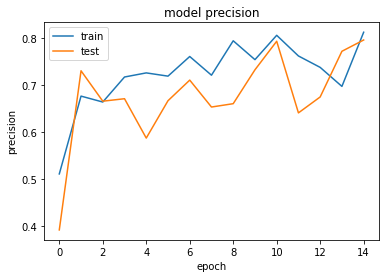

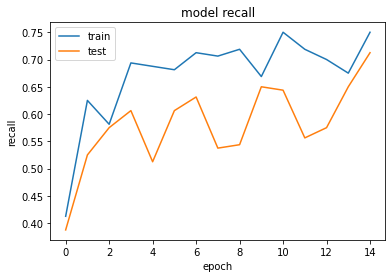

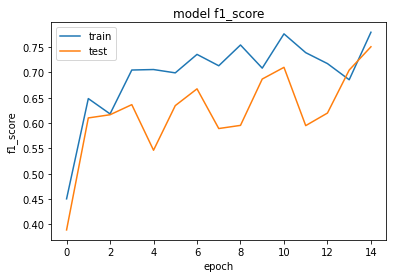

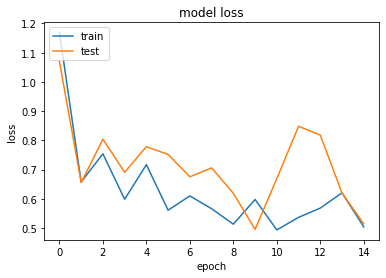

In [85]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

Gráfico de Perda: No decorrer das épocas, de uma maneira geral, o índice foi diminuindo com pouca variação (gráfico de treino e teste com comportamento parecidos). Exceção somente das epocas 9 à 12 onde o índice voltou a subir, mas a partir da epoca 13 o índice foi diminuindo, finalizando o processamento com valores em um aspecto descendente.

Gráfico de precisão: No decorrer das épocas, de uma maneira geral, o índice foi aumentando com pouca variação (gráfico de treino e teste com comportamento parecidos). Exceção somente das epocas 9 à 12 onde o índice voltou a cair, mas a partir da epoca 13 o índice foi aumentando, finalizando o processamento com valores em um aspecto acendente.

Gráfico de Sensibilidade: No decorrer das épocas, de uma maneira geral, o índice foi aumentando com pouca variação no treino e com grande variação no teste. Nas epocas finais, tanto o indice de treino quanto o de teste aumentam a ponto de ficarem com valores próximos, finalizando o processamento com um aspecto acendente.

Gráfico de Pontuação f1: No decorrer das épocas, de uma maneira geral, o índice foi aumentando com pouca variação no treino e com grande variação no teste. É possível constatar claramente que nesse ponto, o índice foi influenciado negativamente pelo valor do indicador de sensibilidade. Nas epocas finais, tanto o indice de treino quanto o de teste aumentam a ponto de ficarem com valores próximos, finalizando o processamento com um aspecto acendente.

De um modo geral, o modelo foi convergindo bem até por volta da época 9, onde houve clara degradação. A partir da epoca 13, o modelo volta a convergir positivamente.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

Precisão: 79,51%
Sensibilidade: 71,25%
Pontuação f1: 75,05%

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

A AlexNet foi lançada em 2012 e melhorou as redes neurais convolucionais convencionais, para que possamos entender a VGG como sucessora da AlexNet, mas foi criada por um grupo diferente chamado Visual Geometry Group na Oxford's e, portanto, o nome VGG, carrega e usa algumas idéias de seus antecessores e aprimora-as e usa camadas neurais profundas convolucionais para melhorar a precisão.

O VGGNet-16 consiste em 16 camadas convolucionais e é muito atraente devido à sua arquitetura uniforme. Semelhante ao AlexNet, ele possui apenas convoluções de 3x3, mas muitos filtros. Pode ser treinado em 4 GPUs por 2-3 semanas. Atualmente, é a escolha mais preferida na comunidade para extração de características de imagens. A configuração de peso do VGGNet está disponível ao público e tem sido usada em muitas outras aplicações e desafios como extrator de recursos de linha de base.

No entanto, o VGGNet consiste em 138 milhões de parâmetros, o que pode ser um pouco difícil de encontrar a configuração ideal. O VGG pode ser alcançado através da transferência de Aprendizado. No qual o modelo é pré-treinado em um conjunto de dados e os parâmetros são atualizados para melhor precisão e você pode usar os valores dos parâmetros.

<p align="center">
    <img src="imagens/vgg16_layers.png">
</p>

<b>CAMADAS DA VGG16</b>

1. Convolução usando 64 filters
2. Convolução usando 64 filters + Max pooling
3. Convolução usando 128 filters
4. Convolução usando 128 filters + Max pooling
5. Convolução usando 256 filters
6. Convolução usando 256 filters
7. Convolução usando 256 filters + Max pooling
8. Convolução usando 512 filters
9. Convolução usando 512 filters
10. Convolução usando 512 filters + Max pooling
11. Convolução usando 512 filters
12. Convolução usando 512 filters
13. Convolução usando 512 filters + Max pooling
14. Camada completamente conectada com 4096 nós
15. Camada completamente conectada com 4096 nós
16. Camada de saída com Softmax activation com 1000 nós.


In [86]:
conv_base = VGG16(include_top=False, weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [87]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [88]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [91]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/15
5/5 [==============================] - 115s 23s/step - loss: 0.6256 - precision_score: 0.7400 - recall_score: 0.7125 - f1_score: 0.7258 - val_loss: 0.7458 - val_precision_score: 0.7249 - val_recall_score: 0.6875 - val_f1_score: 0.7055
Epoch 2/15
5/5 [==============================] - 117s 23s/step - loss: 0.6411 - precision_score: 0.7017 - recall_score: 0.6750 - f1_score: 0.6881 - val_loss: 0.5620 - val_precision_score: 0.7054 - val_recall_score: 0.6750 - val_f1_score: 0.6898
Epoch 3/15
5/5 [==============================] - 112s 22s/step - loss: 0.4179 - precision_score: 0.8220 - recall_score: 0.7875 - f1_score: 0.8040 - val_loss: 0.9679 - val_precision_score: 0.7345 - val_recall_score: 0.7063 - val_f1_score: 0.7200
Epoch 4/15
5/5 [==============================] - 113s 23s/step - loss: 0.7195 - precision_score: 0.6914 - recall_score: 0.6687 - f1_score: 0.6798 - val_loss: 0.5712 - val_precision_score: 0.7524 - val_recall_score: 0.7437 - val_f1_score: 0.7480
Epoch 5/15
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

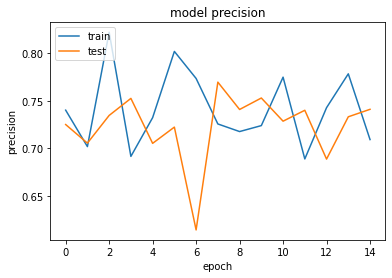

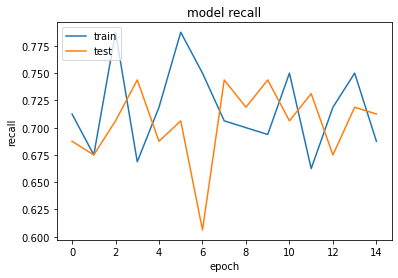

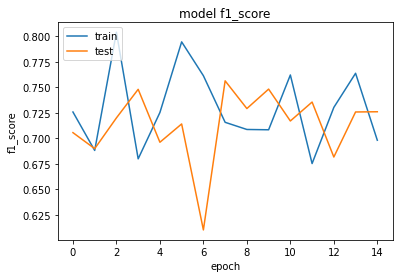

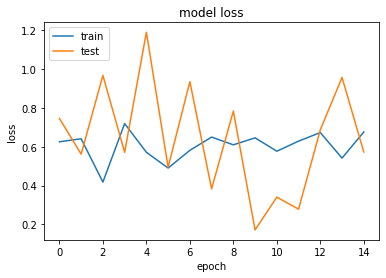

In [92]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

Gráfico de Perda: No decorrer das épocas, durante o treino o índice sofreu pouca variação finalizando próximo ao valor que começou. Já nos testes, o índice sofreu variações significantes, entretanto finalizou também próximo ao valor que iniciou. O aspecto do gráfico denota uma estabilização, ou seja, as 15 epocas não suficientes para melhorar o índice.

Gráfico de precisão: O índice de precisão sofreu grandes variações no decorrer das epocas. Durante o treino, as variações foram ascendentes, já nos testes, as variações foram descendentes. O aspecto do gráfico denota uma estabilização, ou seja, os valores ficaram bem próximos aos do início.

Gráfico de Sensibilidade: O índice de sensibilidade sofreu grandes variações no decorrer das epocas. Durante o treino, as maiores variações foram ascendentes, já nos testes, a maior variação foi descendente. O aspecto do gráfico denota uma estabilização, ou seja, os valores ficaram bem próximos aos do início.

Gráfico de Pontuação f1: No decorrer das épocas, de uma maneira geral, o índice de pontuação f1 sofreu grandes variações. Durante o treino, as maiores variações foram ascendentes, já nos testes, a maior variação foi descendente. O aspecto do gráfico denota uma estabilização, ou seja, os valores ficaram bem próximos aos do início.

De um modo geral, as 15 epocas não foram suficientes para fazer o modelo convergir, embora a acurácia tenha ficado acima de 70%, esse valor foi obtido já na primeira epoca.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

Precisão: 74,09%
Sensibilidade: 71,25%
Pontuação f1: 72,60%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

O VGG19 é uma variante do modelo VGG que, em suma, consiste em 19 camadas (16 camadas de convolução, 3 camadas totalmente conectadas, 5 camadas MaxPool e 1 camada SoftMax). O VGG19 possui 19,6 bilhões de FLOPs.

- Conv3x3 (64)
- Conv3x3 (64)
- MaxPool
- Conv3x3 (128)
- Conv3x3 (128)
- MaxPool
- Conv3x3 (256)
- Conv3x3 (256)
- Conv3x3 (256)
- Conv3x3 (256)
- MaxPool
- Conv3x3 (512)
- Conv3x3 (512)
- Conv3x3 (512)
- Conv3x3 (512)
- MaxPool
- Conv3x3 (512)
- Conv3x3 (512)
- Conv3x3 (512)
- Conv3x3 (512)
- MaxPool
- Fully Connected (4096)
- Fully Connected (4096)
- Fully Connected (1000)
- SoftMax

<p align="center">
    <img src="imagens/comparacao_vgg.png">
</p>

A coluna E do quadro acima, exibe como é a arquitetura VGG19. As demais colunas, são para outras variantes dos modelos VGG:

- Coluna A: Contém 8 camadas CNN, totalizando 11 camadas, incluindo as camadas totalmente conectadas (FC) e não possui diferença interna, exceto o número de camadas.
- A-LRN: também é semelhante à coluna A, mas possui uma etapa extra de Normalização da resposta local (LRN), que implementa a inibição lateral na camada, ou seja ele produz um pico significativo e, assim, cria um máximo local que aumenta a percepção sensorial que podemos desejar em nossa CNN, mas foi visto que, para esse caso específico que é o ILSVRC, não estava aumentando a precisão e a rede geral estava demorando mais tempo para treinar.
- Coluna C: Contém 13 camadas CNN e 16 incluindo as camadas FC. Nesta arquitetura, os autores usaram um filtro conv de (1 * 1) apenas para introduzir não linearidade e, portanto, melhor discriminação.
- Colunas B e D: essas colunas apenas adicionam camadas CNN extras e são de 13 e 16 camadas, respectivamente.

Com isso, podemos ver que CNNs profundas podem obter uma precisão realmente melhor implementando mais camadas e podem reduzir a computação implementando camadas de filtro conv 3 * 3, em vez de apenas um filtro 7 * 7, que eventualmente reduziu o número de parâmetros e, portanto, o tempo computacional .

<b>USO DA REDE NEURAL VGG</b>

O principal objetivo para o qual a rede VGG foi projetada era vencer o ILSVRC, mas foi usado de várias outras maneiras:

- Utilizados apenas como uma boa arquitetura de classificação para muitos outros conjuntos de dados, e como os autores disponibilizaram os modelos ao público, eles podem ser usados como estão ou com modificações para outras tarefas semelhantes.
- Transfer learning: também pode ser usado para tarefas de reconhecimento facial.
- Os pesos estão facilmente disponíveis em outros frameworks, como keras, para que possam ser mexidos e usados conforme desejado.

In [93]:
conv_base = VGG19(include_top=False, weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [94]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [95]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [99]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/15
5/5 [==============================] - 127s 25s/step - loss: 0.6527 - precision_score: 0.6860 - recall_score: 0.6687 - f1_score: 0.6772 - val_loss: 0.8109 - val_precision_score: 0.6732 - val_recall_score: 0.6687 - val_f1_score: 0.6709
Epoch 2/15
5/5 [==============================] - 126s 25s/step - loss: 0.7040 - precision_score: 0.6812 - recall_score: 0.6812 - f1_score: 0.6812 - val_loss: 0.8606 - val_precision_score: 0.7327 - val_recall_score: 0.7188 - val_f1_score: 0.7256
Epoch 3/15
5/5 [==============================] - 126s 25s/step - loss: 0.7938 - precision_score: 0.6749 - recall_score: 0.6625 - f1_score: 0.6685 - val_loss: 1.0938 - val_precision_score: 0.6000 - val_recall_score: 0.6000 - val_f1_score: 0.6000
Epoch 4/15
5/5 [==============================] - 126s 25s/step - loss: 0.7099 - precision_score: 0.7125 - recall_score: 0.7125 - f1_score: 0.7125 - val_loss: 0.6799 - val_precision_score: 0.6660 - val_recall_score: 0.6500 - val_f1_score: 0.6578
Epoch 5/15
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

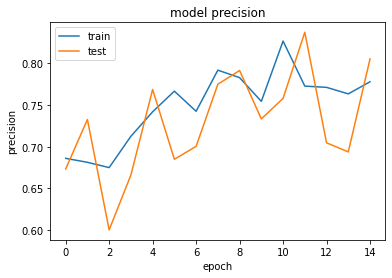

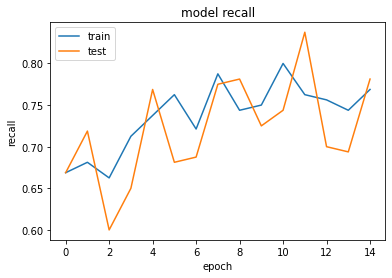

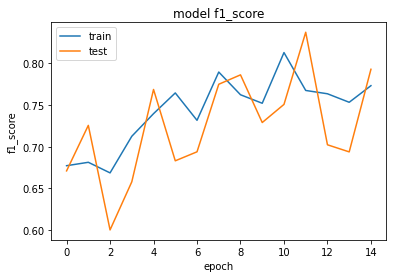

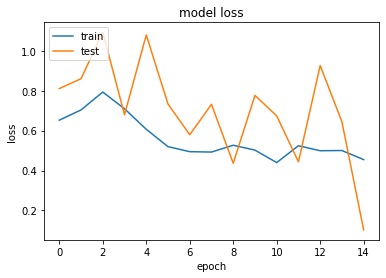

In [100]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

Gráfico de Perda: No decorrer das épocas, durante o treino o índice sofreu quedas constantes, porém não muito abaixo do valor inicial. Já nos testes, o índice sofreu variações significantes e finalizou com um valor bem baixo. O gráfico ficou com um aspecto descendente, tanto no treino quanto nos testes.

Gráfico de precisão: O índice de precisão sofreu variações constantes no treino e terminou com valor acima do iniciado. Já nos testes, houve grandes variações e o valor final foi bem acima do iniciado. O gráfico ficou com um aspecto ascendente, tanto no treino quanto nos testes.

Gráfico de Sensibilidade: O índice de sensibilidade sofreu variações no decorrer das epocas e terminou com valor acima do iniciado. Já nos testes, houve grandes variações e o valor final foi bem acima do iniciado. O gráfico ficou com um aspecto ascendente, tanto no treino quanto nos testes.

Gráfico de Pontuação f1: Assim como o índice de sensibilidade, o índice de pontuação f1 sofreu variações no decorrer das epocas e terminou com valor acima do iniciado. Já nos testes, houve grandes variações e o valor final foi bem acima do iniciado. O gráfico ficou com um aspecto ascendente, tanto no treino quanto nos testes.

De um modo geral, o modelo foi variando mas melhorando os índice e houve uma melhora bem acentuada na última epoca.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

Precisão: 80,54%
Sensibilidade: 78,12%
Pontuação f1: 79,30%

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 79,51 %  | 71,25 %       | 75,05 %  |
| VGG16    | 74,09 %  | 71,25 %       | 72,60 %  |
| VGG19    | 80,54 %  | 78,12 %       | 79,30 %  |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:

Para as 15 epocas que foram geradas, o modelo que obteve os melhores indicadores foi o VGG19 (80,54% de precisaão). Embora a Resnet50 tenha conseguindo, inicialmente, uma curva mais aguda, não obteve o melhor resultado final. Por se tratar de uma rede profunda (50 camadas), há necessidade de maior tempo de treinamento para obter resultados melhores.

Com 16 camadas, a VGG16 foi a que iniciou com os melhores índices, mas essa rede se mostrou um pouco lenta para conseguir convergir.

A VGG19, com 19 camadas, teve uma convergência constante e no final, conseguiu obter o melhor resultado.

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [3]:
#IMPLEMENTE
from keras.applications import Xception
from keras.applications.xception import preprocess_input

conv_base = Xception(include_top=False, weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

In [7]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [10]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [15]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)


Epoch 1/15
5/5 [==============================] - 75s 15s/step - loss: 1.0749 - precision_score: 0.2857 - recall_score: 0.0812 - f1_score: 0.1260 - val_loss: 41.7535 - val_precision_score: 0.3250 - val_recall_score: 0.3250 - val_f1_score: 0.3250
Epoch 2/15
5/5 [==============================] - 66s 13s/step - loss: 1.0128 - precision_score: 0.5127 - recall_score: 0.1562 - f1_score: 0.2265 - val_loss: 39.2107 - val_precision_score: 0.2750 - val_recall_score: 0.2750 - val_f1_score: 0.2750
Epoch 3/15
5/5 [==============================] - 66s 13s/step - loss: 0.9226 - precision_score: 0.6778 - recall_score: 0.3750 - f1_score: 0.4813 - val_loss: 39.0020 - val_precision_score: 0.3125 - val_recall_score: 0.3125 - val_f1_score: 0.3125
Epoch 4/15
5/5 [==============================] - 66s 13s/step - loss: 0.8274 - precision_score: 0.6584 - recall_score: 0.4062 - f1_score: 0.4971 - val_loss: 29.6759 - val_precision_score: 0.3750 - val_recall_score: 0.3750 - val_f1_score: 0.3750
Epoch 5/15
5/5 

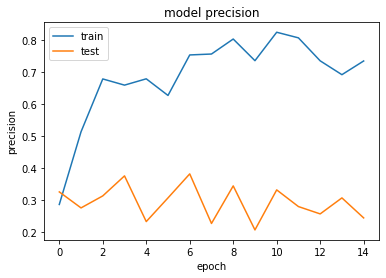

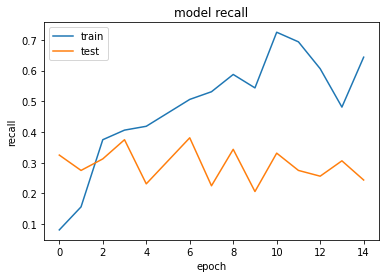

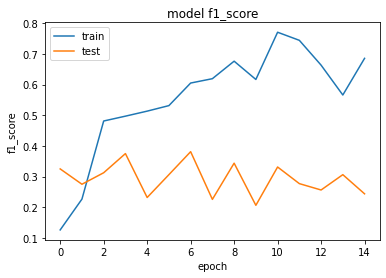

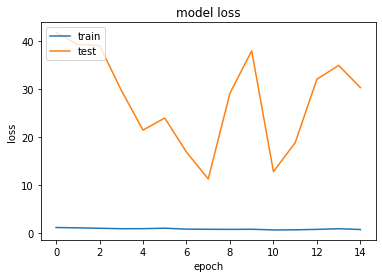

In [17]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

Utilizando a mesma estrutura, os mesmos dados e os mesmos número de epocas, o modelo implementado se mostrou incorreto nos testes, pois a precisão ficou 24,38%. No treino, o modelo mostrou uma precisão de 73,39%, mas o desempenho na validação fui muito ruim.